# Multiple Linear Regression
## Gabriel Briones Sayeg A01222517

In [1]:
from sklearn.linear_model import LinearRegression
from pandas import read_csv
from regressors import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oil_data = read_csv('oil.csv')
x = oil_data.iloc[:22,1:9]
y = oil_data.iloc[:22,9]
reg = LinearRegression()
reg.fit(x, y)
stats.summary(reg, x, y)

Residuals:
    Min      1Q  Median      3Q      Max
-13.687 -4.1725  0.2122  4.9171  11.4881


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept -62.324990   82.701720  -0.7536  0.459449
x1          -0.068315    0.005168 -13.2197  0.000000
x2           0.058864    0.008127   7.2431  0.000000
x3           0.005765    0.010989   0.5246  0.605384
x4           0.207588    0.035183   5.9003  0.000007
x5          -1.060278    0.401562  -2.6404  0.015298
x6          58.204693   16.361885   3.5573  0.001862
x7           0.567346    3.187355   0.1780  0.860430
x8           0.810337    0.055053  14.7191  0.000000
---
R-squared:  0.99778,    Adjusted R-squared:  0.99641
F-statistic: 729.86 on 8 features


In [64]:
x.insert(0, "x0", 1)
b = np.insert(reg.coef_, 0, reg.intercept_)

In [66]:
print(x.shape)
print(y.shape)
print(b.shape)

(22, 9)
(22,)
(9,)


In [67]:
x.T.dot(x).shape

(9, 9)

In [68]:
xtx = x.T.dot(x)
xtx_inv = pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
xtx_inv.dot(x.T).shape

(9, 22)

In [69]:
np.linalg.det(xtx)

2.832160608665612e+29

In [71]:
xtx_inv.dot(xtx)

,x0,x1,x2,x3,x4,x5,x6,x7,x8
x0,1.000000e+00,-2.117413e-07,5.221025e-06,-9.300940e-08,-2.242770e-07,1.387434e-07,8.020533e-10,4.386545e-08,5.965737e-07
x1,-7.559365e-16,1.000000e+00,-3.791363e-12,-8.696851e-13,-1.315671e-12,-9.224015e-14,-1.482827e-15,-2.169594e-14,-4.555929e-13
x2,-2.255845e-13,9.646165e-12,1.000000e+00,-2.125284e-12,-9.533402e-12,1.118313e-11,7.020390e-14,3.491903e-12,4.848054e-11
x3,-1.179214e-13,-1.026257e-11,2.031391e-10,1.000000e+00,-9.366241e-12,5.404920e-12,3.082627e-14,1.711324e-12,2.319377e-11
x4,-3.857912e-13,5.618785e-11,7.704186e-10,4.265750e-12,1.000000e+00,2.029695e-11,1.354466e-13,6.271040e-12,8.851114e-11
x5,5.504102e-11,1.316661e-09,-9.893292e-08,1.216292e-09,3.374760e-09,1.000000e+00,-1.573581e-11,-8.249293e-10,-1.132142e-08
x6,6.808912e-10,1.040757e-07,-1.119629e-06,3.216608e-08,6.734853e-08,-2.987738e-08,1.000000e+00,-9.537963e-09,-1.275827e-07
x7,-2.243267e-11,-7.216138e-10,4.003212e-08,-5.361901e-10,-1.446407e-09,1.062714e-09,6.318083e-12,1.000000e+00,4.577837e-09
x8,7.351897e-13,-1.450644e-10,-1.513172e-09,-1.580247e-11,-1.705303e-12,-3.981171e-11,-2.733369e-13,-1.224265e-11,1.000000e+00


In [74]:
xtx_inv.dot(x.T).dot(y)

x0   -62.324990
x1    -0.068315
x2     0.058864
x3     0.005765
x4     0.207588
x5    -1.060278
x6    58.204693
x7     0.567346
x8     0.810337
dtype: float64

In [75]:
b

array([-6.23249905e+01, -6.83153590e-02,  5.88637225e-02,  5.76456934e-03,
        2.07588361e-01, -1.06027754e+00,  5.82046929e+01,  5.67345594e-01,
        8.10337002e-01])

In [82]:
data = oil_data.iloc[:22,1:]
data.corr(method="pearson").iloc[:, 8]

x1    0.984701
x2    0.964283
x3    0.822596
x4    0.989385
x5    0.958236
x6   -0.895757
x7    0.979792
x8    0.994286
y     1.000000
Name: y, dtype: float64

In [83]:
data.corr(method="pearson")

,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.000000,0.988295,0.854469,0.996827,0.983236,-0.934294,0.976601,0.980279,0.984701
x2,0.988295,1.000000,0.889879,0.986344,0.995459,-0.955527,0.959790,0.947898,0.964283
x3,0.854469,0.889879,1.000000,0.837211,0.878257,-0.815743,0.841721,0.802835,0.822596
x4,0.996827,0.986344,0.837211,1.000000,0.983900,-0.939181,0.976990,0.981352,0.989385
x5,0.983236,0.995459,0.878257,0.983900,1.000000,-0.967804,0.961711,0.942152,0.958236
x6,-0.934294,-0.955527,-0.815743,-0.939181,-0.967804,1.000000,-0.904192,-0.879977,-0.895757
x7,0.976601,0.959790,0.841721,0.976990,0.961711,-0.904192,1.000000,0.978895,0.979792
x8,0.980279,0.947898,0.802835,0.981352,0.942152,-0.879977,0.978895,1.000000,0.994286
y,0.984701,0.964283,0.822596,0.989385,0.958236,-0.895757,0.979792,0.994286,1.000000


Text(0, 0.5, 'y')

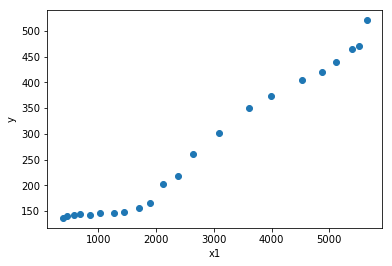

In [85]:
plt.scatter(oil_data.iloc[:22,1], y)
plt.xlabel('x1')
plt.ylabel('y')

Text(0, 0.5, 'y')

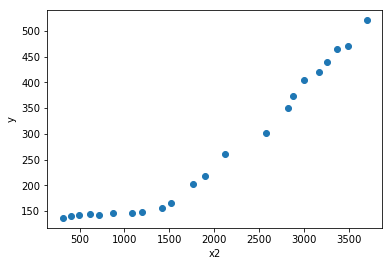

In [87]:
plt.scatter(oil_data.iloc[:22,2], y)
plt.xlabel('x2')
plt.ylabel('y')

Text(0, 0.5, 'y')

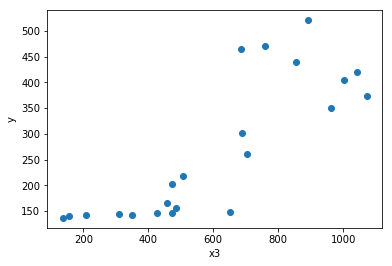

In [88]:
plt.scatter(oil_data.iloc[:22,3], y)
plt.xlabel('x3')
plt.ylabel('y')

Text(0, 0.5, 'y')

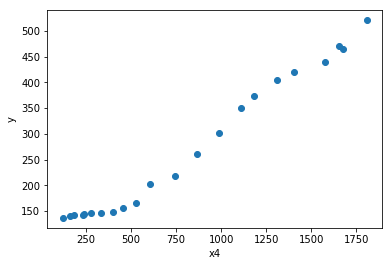

In [89]:
plt.scatter(oil_data.iloc[:22,4], y)
plt.xlabel('x4')
plt.ylabel('y')

Text(0, 0.5, 'y')

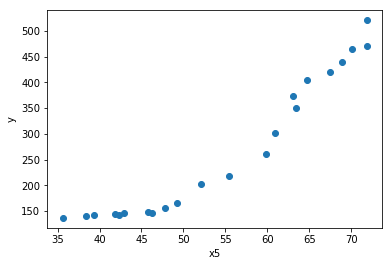

In [90]:
plt.scatter(oil_data.iloc[:22,5], y)
plt.xlabel('x5')
plt.ylabel('y')

Text(0, 0.5, 'y')

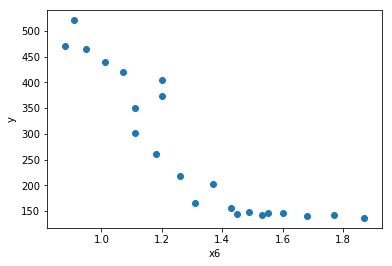

In [91]:
plt.scatter(oil_data.iloc[:22,6], y)
plt.xlabel('x6')
plt.ylabel('y')

Text(0, 0.5, 'y')

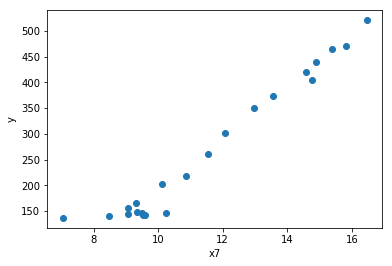

In [92]:
plt.scatter(oil_data.iloc[:22,7], y)
plt.xlabel('x7')
plt.ylabel('y')

Text(0, 0.5, 'y')

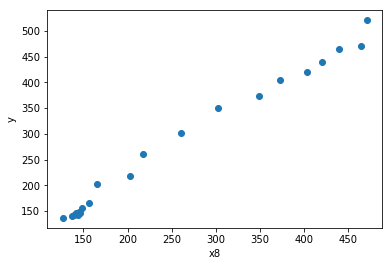

In [93]:
plt.scatter(oil_data.iloc[:22,8], y)
plt.xlabel('x8')
plt.ylabel('y')

In [99]:
x_test = oil_data.iloc[22:, 1:9]
y_pred = reg.predict(x_test)
y_pred

array([ 595.93299811,  694.12157963,  849.66354729,  965.59642151,
       1163.65694312])

In [116]:
x = oil_data.iloc[:22,1:9]
x = x.filter(items=["x1", "x2", "x4", "x8"])

regB = LinearRegression()
regB.fit(x, y)

x_test = x_test.filter(items=["x1", "x2", "x4", "x8"])

y_pred = regB.predict(x_test)
y_pred


array([ 579.26540332,  668.78988893,  795.2561761 ,  887.51093083,
       1058.65183061])

In [121]:
x = oil_data.iloc[:22,1:9]
x.insert(0, "x0", 1)
b = np.insert(reg.coef_, 0, reg.intercept_)

In [135]:
x_test.insert(0, "x0", 1)
x_test.filter(items=["x0", "x1", "x2", "x4", "x8"]).dot([b[0], b[1], b[2], b[4], b[8]])

22     609.188213
23     706.159031
24     856.847074
25     972.203685
26    1167.563835
dtype: float64